<h1 style="font-size:2rem;">Dataset Information</h1> 

In order to build a music recommendation system, we used the Million Songs Dataset. Million Songs Dataset contains of two files: triplet_file and metadata_file. The triplet_file contains user_id, song_id and listen time. The metadata_file contains song_id, title, release, year and artist_name. Million Songs Dataset is a mixture of song from various website with the rating that users gave after listening to the song.

## Import Libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import Recommenders as Recommenders

## Reading the Data

In [5]:
song_df_1 = pd.read_csv('E:\\Audacity\\Data 2\\triplets_file.csv')
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [6]:
song_df_2 = pd.read_csv(r'E:\Audacity\Data 2\song_data.csv')
song_df_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [7]:
#merging both data and dropping duplicates
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [8]:
len(song_df)

2000000

## Data Preprocessing

In [62]:
#combining title and artist_name to create song key words
song_df['song']=song_df['title'] + " - " + song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
4979,e21477efb83bd323205ce6f5bd662f3df9d477e5,SOOEQSA12AF729BE63,24,Some Velvet Morning,Evil Heat,Primal Scream;Kate Moss,2002,Some Velvet Morning - Primal Scream;Kate Moss
6309,7ee2550ad5867a0793a624eb1b3284e49639c45f,SONPVVW12AB017F557,7,A Dying Cub Fan's Last Request,Affordable Art,Steve Goodman,0,A Dying Cub Fan's Last Request - Steve Goodman
887,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,SOSZJFV12AB01878CB,2,Teach Me How To Dougie,Teach Me How To Dougie,California Swag District,0,Teach Me How To Dougie - California Swag District
4175,bab8d135cf88852063ed4a084dd24c783d7ff841,SOCAFDI12A8C13D10E,2,TTHHEE PPAARRTTYY,Justice,Justice,0,TTHHEE PPAARRTTYY - Justice
4512,18dc95f354220b343e98ebbb7c8564291284ed9f,SOUOEMP12A8C13866E,2,Paper Planes,Decent Work For Decent Pay,M.I.A.,0,Paper Planes - M.I.A.


In [63]:
song_df['title'][0]+" - "+song_df['artist_name'][0]

'The Cove - Jack Johnson'

In [64]:
# taking top 10k samples for quick results
song_df = song_df.sample(n=10000)

In [65]:
# aggregating listen count - cummulative sum of listen_count
song_grouped = song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index
song_grouped

<bound method DataFrame.reset_index of                                           listen_count
song                                                  
#40 - DAVE MATTHEWS BAND                             1
& Down - Boys Noize                                  4
'97 Bonnie & Clyde - Eminem                          2
'Round Midnight - Miles Davis                        3
'Till I Collapse - Eminem / Nate Dogg                6
...                                                ...
sleep_ eat food_ have visions - Four Tet             2
sun drums and soil - Four Tet                        3
you were there with me - Four Tet                    2
¿Lo Ves? [Piano Y Voz] - Alejandro Sanz              1
Época - Gotan Project                                1

[5151 rows x 1 columns]>

In [66]:
grouped_sum = song_grouped(['listen_count']).sum()
song_grouped['percentage']= (song_grouped['listen_count'] / grouped_sum) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0, 1])

KeyError: 'Requested level (listen_count) does not match index name (song)'

## Recommend based on popularity

In [67]:
pr = Recommenders.popularity_recommender_py()

In [68]:
pr.create(song_df, 'user_id', 'song')

In [69]:
# display the top 10 popular songs
pr.recommend(song_df['user_id'][5])

,user_id,song,score,Rank
3660,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,45,1.0
4678,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,2.0
5105,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,3.0
1071,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,28,5.0
4378,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,6.0
4712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,7.0
3476,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,26,8.0
1387,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,24,9.0
1862,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


In [70]:
pr.recommend(song_df['user_id'][100])

,user_id,song,score,Rank
3660,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,45,1.0
4678,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,32,2.0
5105,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,32,3.0
1071,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,28,5.0
4378,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,27,6.0
4712,e006b1a48f466bf59feefed32bec6494495a4436,Use Somebody - Kings Of Leon,27,7.0
3476,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,26,8.0
1387,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,24,9.0
1862,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


## Exploratory Data Analysis

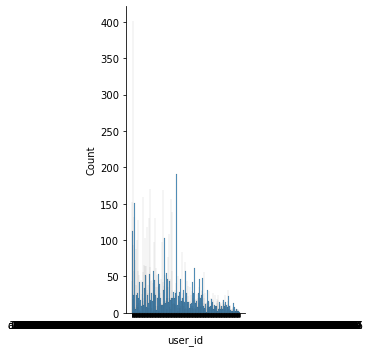

In [81]:
#song's popularity depending on listen_count
sns.displot(song_df['user_id'])

## Recommending based on similarity

In [71]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(song_df, 'user_id', 'song')

In [74]:
#past history of a particular user
user_items = ir.get_user_items(song_df['user_id'][100])

In [75]:
# display user songs history
for user_item in user_items:
    print(user_item)

Marry Me - Train
Dog Days Are Over (Radio Edit) - Florence + The Machine
Esta Es Para Hacerte Féliz - Jorge Gonzalez
Revelry - Kings Of Leon
Lady In Black - Ensiferum
For You (Amended/Radio Edit LP) - Staind
Ain't Misbehavin - Sam Cooke
Use Somebody - Kings Of Leon
Corn Bread - DAVE MATTHEWS BAND
Fireflies - Charttraxx Karaoke
Cry For Help (Album Version) - Shinedown
Drop The World - Lil Wayne / Eminem
OMG - Usher featuring will.i.am
Sehr kosmisch - Harmonia
Hey_ Soul Sister - Train
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Someone Else's Arms - Mae
Rhyme & Reason - DAVE MATTHEWS BAND
High Life - Daft Punk
Secrets - OneRepublic
Undo - Björk
Blow Me Away - Breaking Benjamin
Come As You Are - Nirvana
Where Did You Sleep Last Night - Nirvana
You're The One - Dwight Yoakam


In [83]:
# give song recommendation for that user
ir.recommend(song_df['user_id'][1])

No. of unique songs for the user: 45
no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :6844


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.043076,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.043076,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.043076,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.043076,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.043076,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The End - Pearl Jam,0.037531,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Heard Them Stirring - Fleet Foxes,0.037531,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Meadowlarks - Fleet Foxes,0.037531,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Id Die Without You - P.M. Dawn,0.037531,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Misled - Céline Dion,0.037531,10


In [78]:
# give related songs based on the words
ir.get_similar_items(['Oliver James - Fleet Foxes'])

no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :46


,user_id,song,score,rank
0,,Quiet Houses - Fleet Foxes,1.000000,1
1,,Sun It Rises - Fleet Foxes,1.000000,2
2,,Your Protector - Fleet Foxes,1.000000,3
3,,Tiger Mountain Peasant Song - Fleet Foxes,1.000000,4
4,,He Doesn't Know Why - Fleet Foxes,0.666667,5
5,,The End - Pearl Jam,0.500000,6
6,,Debaser - Pixies,0.500000,7
7,,Heard Them Stirring - Fleet Foxes,0.500000,8
8,,Drops In The River - Fleet Foxes,0.500000,9
9,,Oh! Sweet Nuthin' (LP Version) - The Velvet Un...,0.500000,10
